In [9]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import fftpack
import PIL
from PIL import Image,ImageEnhance
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

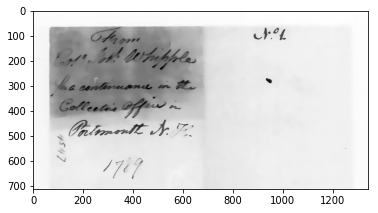

In [29]:
img1=cv.imread("H05.bmp",0)
dst = cv.fastNlMeansDenoising(img1,5,21,7) 
plt.imshow(dst, cmap='gray')

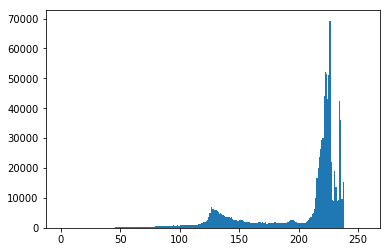

In [30]:
plt.hist(dst.ravel(),256,[0,256]) 
plt.show()

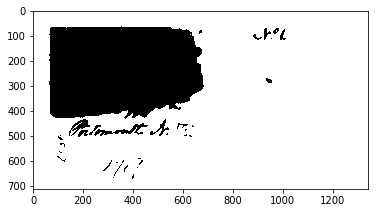

In [31]:
ret3,otsu = cv.threshold(dst,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(otsu, cmap='gray')

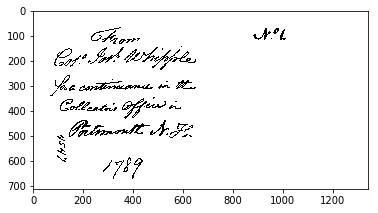

In [33]:
out_image = otsu
image = cv.imread('h05.bmp',0)
gt_image = cv.imread('h05.tiff',0)
plt.imshow(gt_image, cmap='gray')

In [34]:
fm = []
image = rgb2gray(image)
image = np.uint8(np.floor(image))
gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image))
rows, columns = gt_image.shape
fp = np.count_nonzero(np.greater(gt_image, out_image))
fn = np.count_nonzero(np.greater(out_image, gt_image))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image, out_image), np.equal(gt_image, np.zeros((rows, columns)))))
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)

In [35]:
print (fm*100)

[27.22674045]
